### 1.목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자 -> 이진분류
- 머신러닝 전체 과정을 이해해보자.

#### 머신러닝 과정
- 1. 문제 정의
- 2. 데이터 수집
- 3. 데이터 전처리
- 4. 탐색적 데이터 분석 : 내용확인, 기술 통계량, 상관관계
- 5. 머신러닝 모델 선택(하이퍼) 및 학습
- 6. 모델 평가 및 예측
- 7. 모델 서비스 

### 2.데이터 불러오기


In [116]:
# kaggle 에서 제공한 데이터 다운 받은 상태
# train : 훈련용 데이터
# test : 테스트용 데이터
# submission : 답안지 파일

# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

q1. 타이타닉 train 데이터와 test 데이터를 변수 train,test 저장하기
(단, 인덱스는 승객번호를 사용할 것.)

In [117]:
# index_col : 컬럼이었던 값을 인덱스로 설정하는 키워드

train = pd.read_csv("./data/train.csv", index_col="PassengerId")
test = pd.read_csv("./data/test.csv",index_col="PassengerId")

In [118]:
# 크기 확인 하기
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [119]:
train.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
test.columns.unique()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### 3.데이터 전처리 및 데이터 탐색
#### 3.1 결측치 확인

In [121]:
# Survived : 생존 여부
# Pclass : 승객 등급 (1~3 1이 상위층)
# Name : 이름
# Sex : 성별
# Age : 나이
# SibSp : 형제자매/ 배우자 수
# Parch : 부모/ 자식 수
# Ticket : 티켓 정보
# Fare : 요금 정보
# Cabin : 객실
# Embarked : 승선항 (S,C,Q)

In [122]:
train.info() 
#3개 컬럼 결측치가 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [124]:
# 결측치 확인
# axis = 0 => 행의 방향
train.isnull().sum()

# age, cabin, embarked 결측치 존재.

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [125]:
test.isnull().sum()
# Age, Cabin , Fare  결측치 존재

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [126]:
# train 결측치 존재 및 컬럼당 결측치 개수 확인
# null 이 존재하는 컬럼 뽑기
# any(): 각 열에 True 요소가 하나 이상 포함 되어 있는지 여부확인
null_col = train.columns[train.isnull().any()]

# 불리언 인덱싱


# 개수까지 확인하고 싶을 때
train[null_col].isnull().sum()


Age         177
Cabin       687
Embarked      2
dtype: int64

In [127]:
test_col = test.columns[test.isnull().any()]

# 불리언 인덱싱


# 개수까지 확인하고 싶을 때
test[test_col].isnull().sum()

Age       86
Fare       1
Cabin    327
dtype: int64

#### 3.2 Embarked 컬럼 결측치 채우기


In [128]:
# 단순하게 최빈값, 평균 값, 중앙값
# 특성의 상관 관계를 확인하고 그걸 기반으로 기술 통계량 확인 후 채움
# 실제 데이터를 찾기 위해서 인터넷 상에서 조사
# train, Embarked 결측치 행 확인 하기
train[train['Embarked'].isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [129]:
# train 데이터 기준으로 데이터 살피기
# 학습에 도움이 되는 데이터 : train
# train 데이터 기준으로 결측치 처리해야한다.
train['Embarked'].value_counts() #s

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [130]:
# 결측치 존재하는 모든 행에 'S'로 채우기
# 결측치가 있다면 해당 value 값으로 채우기

train['Embarked'] = train['Embarked'].fillna("S")
train[train['Embarked'].isnull()] # 처리 확인용

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


#### 3.3 Fare 채우기
- test 데이터의 fare 1개의 결측치 존재
  

In [131]:
# 요금 컬럼 기술 통계량 확인해보기

train['Fare'].describe()

# 평균과 중앙값 중에 요금 데이터의 대표성을 가지고 있는 건 중앙 값
# median


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [132]:
# 생존/사망에 영향을 줬을 것 같은 다른 컬럼을 확인해보기
# 상관 관계 확인

# -1 ~1 : -1,1에 가까울 수록 상관 관계가 높다.
# 0 : 0에 가까울 수록 비교적 상관 관계가 낮음
train.corr()['Survived'].abs().sort_values(ascending=False)

# Pclass 컬럼이 비교적 상관관계가 높음을 확인

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

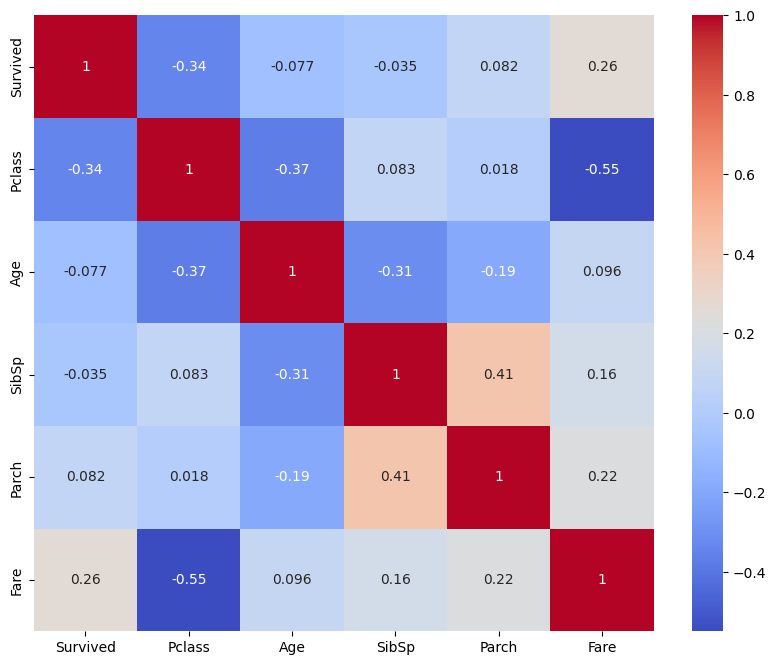

In [133]:
# 상관관계 시각화 >> 히트맵 그래프 그려보기
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True, cmap='coolwarm')
plt.show()

In [134]:
# test-fare 결측치 존재하는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [135]:
# 상관 관계는 수치 값으로 이루어진 컬럼에 대해서만 적용
# 문자열 형태로 되어 있는 컬럼도 연관시켜보자
# 성별 데이터를 연관 시켜보자.
# Pclass, Sex, Fare
# 1 - 여성 - 요금 중앙값
# 1 - 남성 - 요금 중앙값
# 3 - 여성
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [136]:
test['Fare'] = test['Fare'].fillna(7.92500)

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### 3.4 Age 결측치 채우기
- 단순 기술 통계치로 채우지 않고 다른 컬럼과의 상관관계를 이용하여 결측치를 채워보자
- 생존 / 사망과 상관이 높은 컬럼 : Pclass
- 범주형 데이터 중에서도 생존/사망 어느 정도 영향을 주는 컬럼 : Sex
  

In [138]:
# 승객의 등급, 성별을 묶어서 나이의 평균값을 확인하기

gb1 = train[['Pclass','Sex','Age']].groupby(["Pclass","Sex"]).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [139]:
# 3등급, male인 사람의 나이 평균 접근해보기
# 중복 인덱스, 멀티인덱스

gb1.loc[(3,'male')]

# 1등급, female 접근하기
gb1.loc[(1,'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [140]:
# train Age 결츶치 행 확인
train[train['Age'].isnull()]
test[test['Age'].isnull()]



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [141]:
# null인지 확인 하는 함수
a = np.array([1,2,np.nan])
np.isnan(a)
# pd.isnull(a)


array([False, False,  True])

In [142]:
# pd.apply() : 사용자가 정의한 복잡한 기능을 하는 함수를 판다스 객체에 적용할 때 사용하는 함수
def test_print(data):
    print(data["Age"])
    
# 행 방향으로 진행
train[['Pclass','Age']].apply(test_print, axis=1)

22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

PassengerId
1      None
2      None
3      None
4      None
5      None
       ... 
887    None
888    None
889    None
890    None
891    None
Length: 891, dtype: object

In [143]:
# 나이 결측치 채워주는 자동화 코드 생성하기
def fill_age(row):
    # 만약 나이가 결측치 라면 gb1에서 나이 평균 값을 가져와보자
    # 아니면 원래 나이 값을 사용하기
    # 1인 데이터를 확인하려면 행단위 처리, 열방향으로 데이터 확인
    if np.isnan(row['Age']):
        age = gb1.loc[(row['Pclass'],row['Sex'])]
        return age
    else:
        return row['Age']
    


In [144]:
train['Age'] = train.apply(fill_age, axis=1).astype('int64')
#train.info()
train['Age'].isnull().sum()

0

In [145]:
#test age 결측치 채우기

test['Age'] = test.apply(fill_age, axis=1).astype('int64')

# 결측치 확인
#test.info()
test['Age'].isnull().sum()

0

#### 3.5 Cabin 결측치 채우기

In [146]:
# 요소 데이터 확인해보기
train['Cabin'].unique()

# nan 값을 임의의 알파벳으로 채우기

train['Deck'] = train['Cabin'].fillna("M")
test['Deck'] = test['Cabin'].fillna("M")

In [147]:
# 알파벳만 추출하기, 문자열의 인덱스 번호 0 번째
train["Deck"]=train["Deck"].str[0]
test["Deck"]=test["Deck"].str[0]

In [148]:
#Cabin 컬럼은 삭제 train, test

train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [149]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

#### 3.6 데이터 탐색
- train데이터를 기준으로 탐색함
- test를 탐색하는 것은 모델의 일반화에 도움이 x
  

#### 3.7 범주형 데이터 살펴보기
##### Deck 시각화

In [150]:
# M에 대한 의미를 살펴보기.
# Deck 기준으로 생존/사망한 사람의 숫자 세어보기
# "Name" 사람의 수를 체크하기 위해서 사용
train_deck = train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()
train_deck

# 0 사망 , 1 생존

# M에서는 사망한 사람도 많고, 생존한 사람도 많지만 상대적으로 사망한 사람이 더 많다
# M이라는 값은 생존/사망 나름대로 영향을 주지 않았을까?


Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

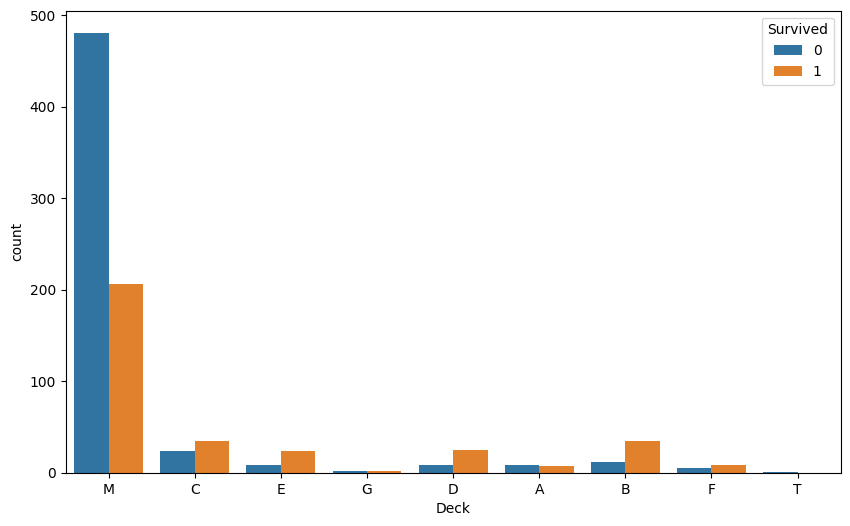

In [151]:
# 시각화
plt.figure(figsize=(10,6))
sns.countplot(data = train, x='Deck', hue='Survived')
plt.show()

##### Pclass 시각화

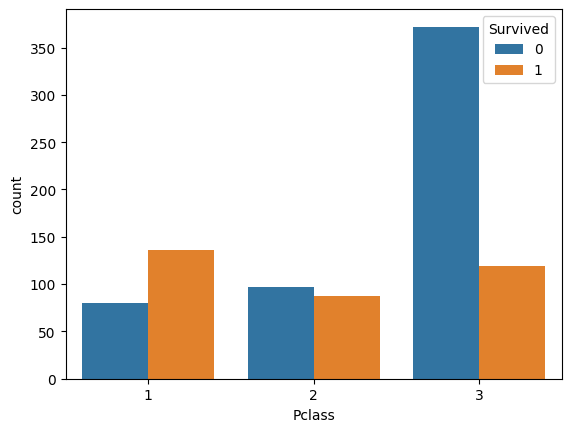

In [152]:
sns.countplot(data=train, x='Pclass', hue = 'Survived')
plt.show()

# 3등급 하위계층 사람들이 많이 사망함

##### Pclass과 Deck 클래스 시각화

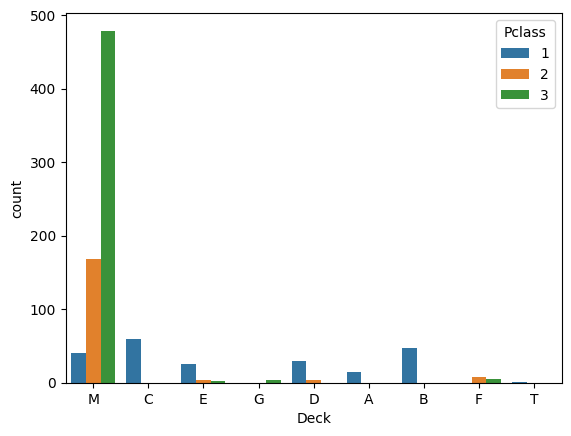

In [153]:
sns.countplot(data = train, x='Deck', hue="Pclass")
plt.show()

# M위치에는 3등급에 대한 사람이 많다.

In [154]:
# M에 대한 의미를 살펴보니 3등급의 사람들이 많이 포함되어 있어서 사망률이 높게 나옴
# M 자체에는 생존/사망 결정하는 큰 요소가 없음
# M에 대한 의미를 더 파악해볼 필요가 없다, 전처리 필요 x

q2. 성별에 따른 생존, 사망 시각화 // 승선항에 따른 생존, 사망 시각화

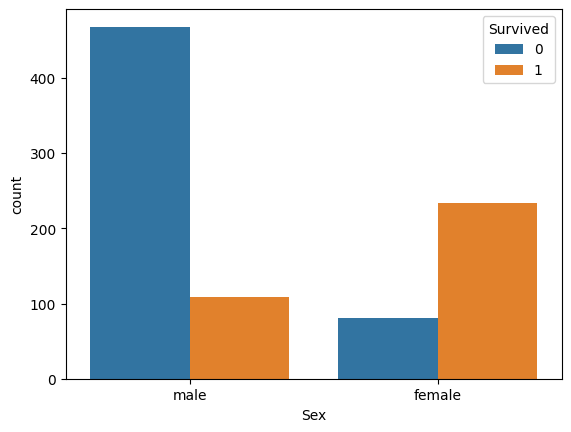

In [155]:
# 성별에 따른 생존자, 사망자 시각화
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

# 여성은 상대적으로 생존 비율이 높음
# 남성은 상대적으로 사망 비율이 높음

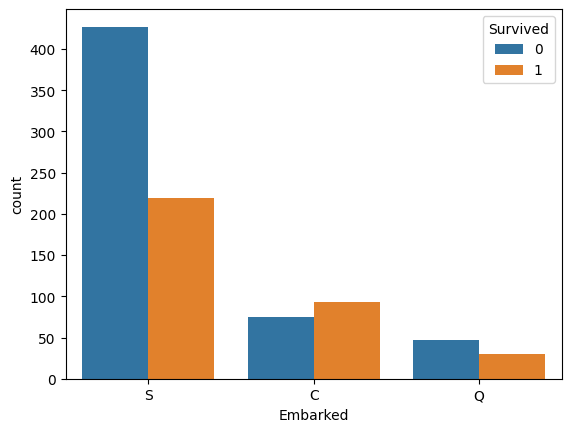

In [156]:
# 승선항에 따른 생존자, 사망자 시각화
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

#### 3.8 수치형 데이터 살펴보기
##### Age 시각화 - 성별 데이터도 연결 생존/사망 확인

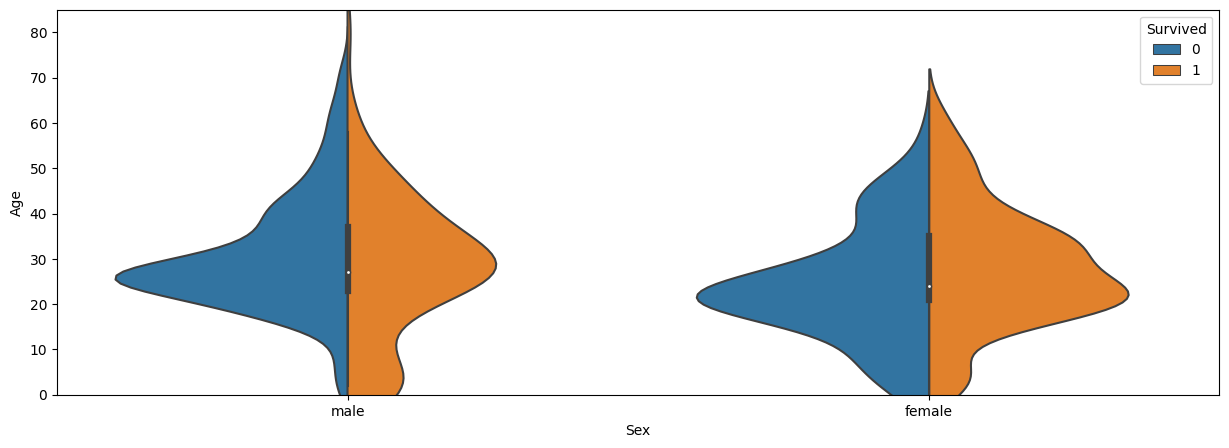

In [157]:
# violinplot(): 바이올린 모양과 비슷, 데이터의 분포를 확인할 때 사용하는 그래프
# y =age , x= sex 분포 : Survived
plt.figure(figsize=(15,5))
sns.violinplot(data = train, x='Sex',y='Age', hue ='Survived', split=True)
plt.ylim(0,85) # y축 범위 제한
plt.show()

In [158]:
# 어린 아이들의 생존율은?
# 상대적으로 남자 아이가 여자 아이에 비해서 많이 살았다.

##### Fare 시각화 - 성별 데이터도 연결 생존/사망 확인

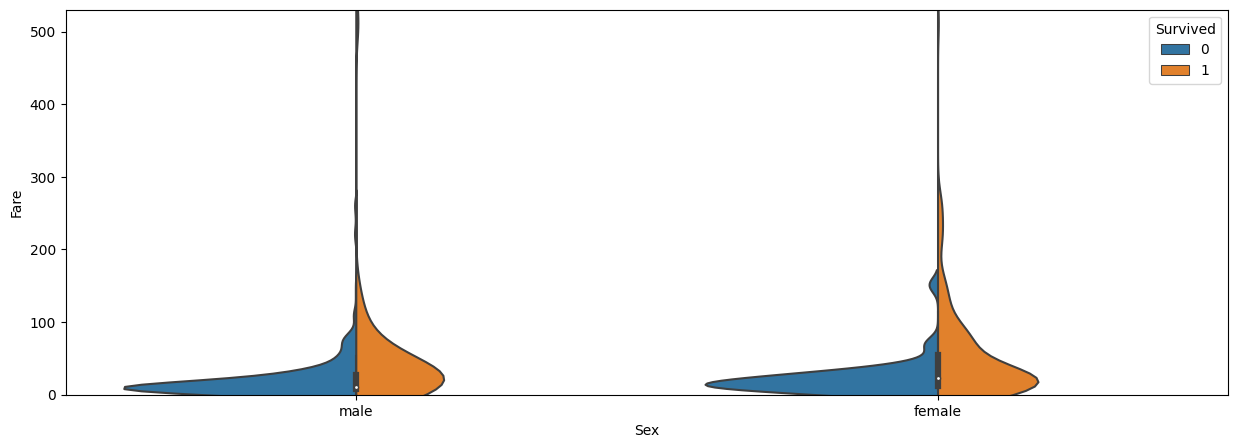

In [159]:
# violinplot(): 바이올린 모양과 비슷, 데이터의 분포를 확인할 때 사용하는 그래프
# y =age , x= sex 분포 : Survived
plt.figure(figsize=(15,5))
sns.violinplot(data = train, x='Sex',y='Fare', hue ='Survived', split=True)
plt.ylim(0,530) # y축 범위 제한
plt.show()

# 요금이 낮은 사람은 상대적으로 많이 사망함

#### 3.9 Parch, SibSp -부모자식, 형제 배우자수
- 특성공학 : 가족의 수라는 컬럼 생성(Parents + Sibsp+1)
- train에 적용했으면, test에도 적용한다.

In [160]:
# 배열 연산
train['Family_Size'] = train['Parch'] + train['SibSp'] +1
test['Family_Size'] = test['Parch'] + test['SibSp'] +1

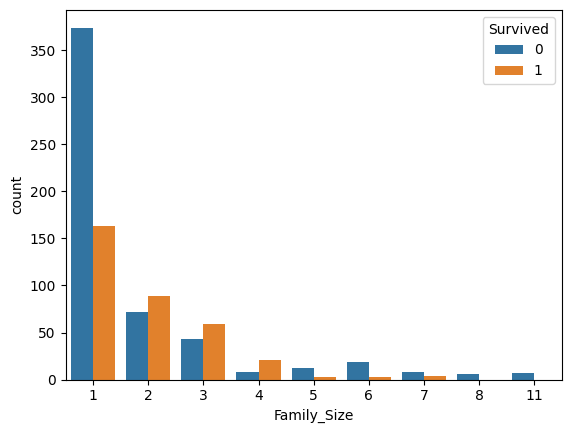

In [161]:
# 시각화 연결하기
# 가족의 수에 따른 생존/사망 확인
train['Family_Size'].value_counts()

sns.countplot(data = train, x='Family_Size', hue="Survived")
plt.show()

In [162]:
# 3개의 범주로 좁힐 수 있음.
# 같은 의미를 내포한다면 범위(카테고리) 를 줄여보자 
# => binning(사소한 관찰의 오류를 줄일 수 있다.)

# 1명일때는 사망비율이 높다
# 2~4일때는 생존 비율이 높음
# 5명 ~이상일 때는 사망비율이 높다.

In [163]:
# pd.cut : 카테고리(범주)형식으로 데이터 정리할 때 사용하는 기능
# 데이터 구간화
# Alone, Small,Large 3개 범주 (구간 ) 설정

bins = [0,1,4,11] # 앞에 있는 숫자값을 포함 x 뒤에 있는 숫자 값을 포함한다.
labels = ["Alone", "Small", "Large"]
train['Family_group'] = pd.cut(train['Family_Size'], bins=bins, labels=labels)
test['Family_group'] = pd.cut(test['Family_Size'], bins=bins, labels=labels)

In [164]:
train['Family_group'].head()

PassengerId
1    Small
2    Small
3    Alone
4    Small
5    Alone
Name: Family_group, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

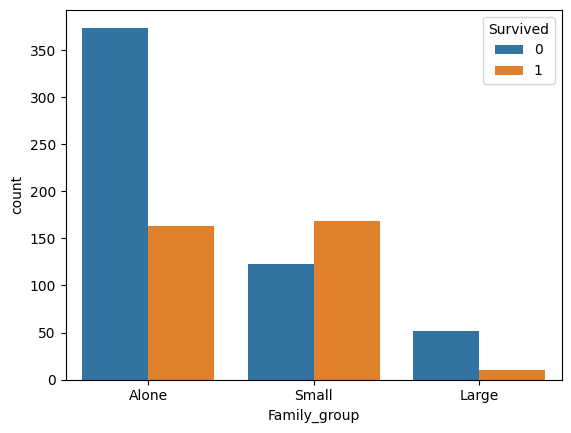

In [165]:
# 시각화 연결하기
train['Family_group'].value_counts()

sns.countplot(data = train, x='Family_group', hue="Survived")
plt.show()

#### 3.10 Text 데이터 다루기
##### 중간 호칭 추출해보기

In [166]:
# 이름 컬럼 접근해서 내용 확인
# train 기준으로 탐색
# strip() -> 문장 앞뒤로 공백을 제거하는 함수
# lstrip() -> 문장 왼쪽 공백 제거하는 함수
# rstrip() -> 문장 오른쪽 공백 제거하는 함수

temp = train['Name'][1].split(",")[1].split(".")[0].strip()
temp


'Mr'

In [167]:
# 호칭 추출하는 함수 정의하기 (사용자 정의 함수)

def split_title(row):
    return row.split(",")[1].split(".")[0].strip()

# apply 
# 데이터 1차원 -> 방향 적용 필요 x
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)
train['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [168]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [169]:
# Title 카테고리 중복 없이 확인해보기
train['Title'].unique()

# Mr 미스터 : 남성, 결혼 유무 상관 없음
# Master : 결혼하지 않은 남성, 주로 청소년 이하
# Ms 미즈 : 여성, 결혼 유무에 상관 없다.
# Miss : 결혼하지 않은 여성
# Mrs : 결혼한 여성
# Don : 기부자
# Rev : 목사
# Dr : 의사 or 박사

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

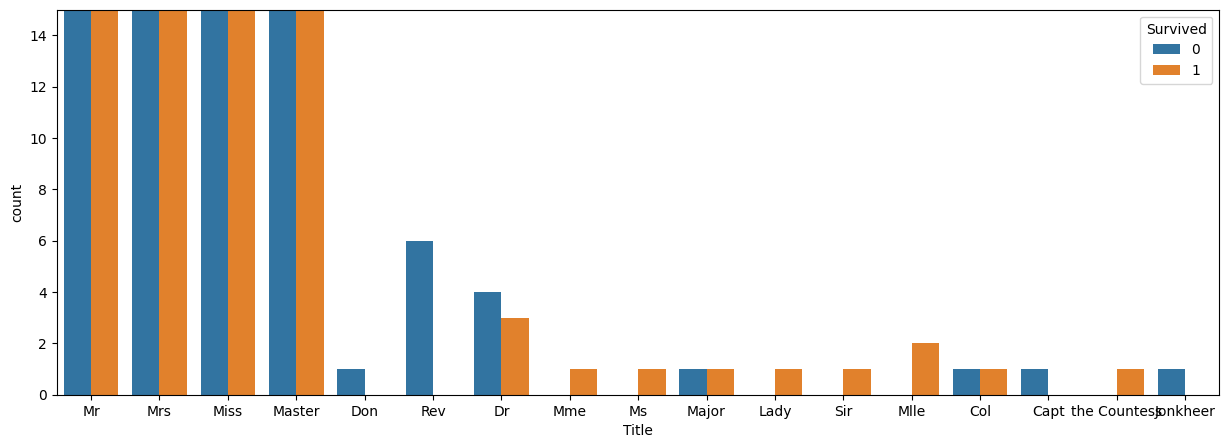

In [170]:
# 호칭에 따른 생존/사망 그래프 시각화
plt.figure(figsize=(15,5))
sns.countplot(data= train, x='Title',hue='Survived')
plt.ylim(0,15)
plt.show()

In [171]:
# Mr, Mrs, Miss, Master, Rev, Other(앞의 5개 제외한 나머지)

title = ['Mr', 'Mrs', 'Miss', 'Master','Rev','Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
cvt_title = ['Mr', 'Mrs', 'Miss', 'Master','Rev'] +['Other']*12
cvt_title


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [172]:
# dict
title_dict = dict(zip(title,cvt_title))
train['Title'] = train['Title'].map(title_dict)

In [173]:
# test- dona 키값이 들어가 져 있어서 title_dict에 추가
title_dict['Dona'] = "Other"

In [174]:
# test 데이터 확인
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [180]:
test['Title'] = test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [181]:
test['Title'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Title, Length: 418, dtype: bool

#### 3.11 불필요한 컬럼 삭제
- drop, 버리기!
- 전처리에서 제외된 컬럼과 특성 공학후 불필요해진 원본 컬럼 삭제

In [182]:
train.columns

# name, family_size, ticket 삭제

# train.drop("Name", axis=1, inplace=True)
train.drop("Family_Size", axis=1, inplace=True)
train.drop("Ticket", axis=1, inplace=True)

KeyError: "['Family_Size'] not found in axis"

In [178]:
test.drop("Name", axis=1, inplace=True)
test.drop("Family_Size", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)

In [183]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Embarked      891 non-null    object  
 9   Deck          891 non-null    object  
 10  Family_group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 116.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   P

#### 3.12 문제 답 데이터 분리

In [210]:
# X_train = train.loc[:,"Pclass":] #생존/사망 여부 제외한 나머지 컬럼
y_train = train.iloc[:,0] # 생존 사망 여부 컬럼 1개 
X_test = test

X_train = train.drop(["Survived","Name"],axis=1)
#y_train = train.loc[:,"Survived"] # 생존 사망 여부 컬럼 1개 
#X_test = test

In [211]:
print("훈련용 데이터 : " ,X_train.shape, y_train.shape)
print("테스트용 데이터 :" ,X_test.shape)

훈련용 데이터 :  (891, 10) (891,)
테스트용 데이터 : (418, 10)


#### 특성 선택 인코딩
- 범주형 데이터 인코딩
- 전체 컬럼 모두 활용해서 학습으로 연결

In [219]:
X_train.info()
y_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
 9   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 102.9+ KB
<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 46.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (tota

In [217]:
# 인코딩 해야하는 컬럼 찾기
cal_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cal_choice = X_train.columns[cal_filter]
cal_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_group', 'Title'], dtype='object')

In [221]:
# X_train 인코딩

for cat_name in cal_choice:
    # 컬럼 1개 인코딩
    dummy = pd.get_dummies(train[cat_name], prefix=cat_name) 
    
    # 기존 X_train추가 (병합)
    # concat은 기본적으로 행방향으로 진행
    # 열방향으로 지정해주기
    X_train = pd.concat([X_train, dummy], axis=1)
    
    # 기존 컬럼 삭제
    X_train.drop(cat_name, axis=1, inplace=True)

In [222]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   Fare                891 non-null    float64
 5   Sex_female          891 non-null    uint8  
 6   Sex_male            891 non-null    uint8  
 7   Embarked_C          891 non-null    uint8  
 8   Embarked_Q          891 non-null    uint8  
 9   Embarked_S          891 non-null    uint8  
 10  Deck_A              891 non-null    uint8  
 11  Deck_B              891 non-null    uint8  
 12  Deck_C              891 non-null    uint8  
 13  Deck_D              891 non-null    uint8  
 14  Deck_E              891 non-null    uint8  
 15  Deck_F              891 non-null    uint8  
 16  Deck_G  

In [223]:
# X_train 인코딩

for cat_name in cal_choice:
    # 컬럼 1개 인코딩
    dummy = pd.get_dummies(test[cat_name], prefix=cat_name) 
    
    # 기존 X_train추가 (병합)
    # concat은 기본적으로 행방향으로 진행
    # 열방향으로 지정해주기
    X_test = pd.concat([X_test, dummy], axis=1)
    
    # 기존 컬럼 삭제
    X_test.drop(cat_name, axis=1, inplace=True)

In [224]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Sex_female          418 non-null    uint8  
 6   Sex_male            418 non-null    uint8  
 7   Embarked_C          418 non-null    uint8  
 8   Embarked_Q          418 non-null    uint8  
 9   Embarked_S          418 non-null    uint8  
 10  Deck_A              418 non-null    uint8  
 11  Deck_B              418 non-null    uint8  
 12  Deck_C              418 non-null    uint8  
 13  Deck_D              418 non-null    uint8  
 14  Deck_E              418 non-null    uint8  
 15  Deck_F              418 non-null    uint8  
 16  Deck_

#### 특성 개수 맞추기
- set: 집합 자료형
- 특징 : 중복허용 x, 순서x
- 중복을 허용하지 않은 set의 특징 덕분에 종종 데이터의 중복을 제거하기 위한 필터 역할
- set활요하다가 정렬, 인덱스 접근으로 활용하고 싶으면, tuple,list형으로 변환해서 사용

In [230]:
set(X_train.columns)-set(X_test.columns)

{'Deck_T'}

In [237]:
# Dect_T 컬럼 X_test에 추가하기

X_test["Deck_T"] = 0

In [252]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Sex_female          418 non-null    uint8  
 6   Sex_male            418 non-null    uint8  
 7   Embarked_C          418 non-null    uint8  
 8   Embarked_Q          418 non-null    uint8  
 9   Embarked_S          418 non-null    uint8  
 10  Deck_A              418 non-null    uint8  
 11  Deck_B              418 non-null    uint8  
 12  Deck_C              418 non-null    uint8  
 13  Deck_D              418 non-null    uint8  
 14  Deck_E              418 non-null    uint8  
 15  Deck_F              418 non-null    uint8  
 16  Deck_

In [241]:
# X_train 컬럼 순서에 X_test 순서도 맞추기

X_test = X_test[X_train.columns]

### 4.모델 선택 및 학습

In [285]:
from sklearn.tree import DecisionTreeClassifier # tree분류
from sklearn.model_selection import cross_val_score # 교차 검증 도구

#### 1.tree model1

In [270]:
tree_model = DecisionTreeClassifier() # 객체 생성

# 학습 
tree_model.fit(X_train,y_train) # 지도학습 - 분류

# 예측
pre = tree_model.predict(X_test)


In [278]:
result = pd.read_csv("./data/gender_submission.csv")
result['Survived'] = pre
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [280]:
result.to_csv("kkh_sumbission01.csv", index=False)

In [281]:
# 모델의 성능이 생각보다 떨어진다.
# 1. 데이터 측면에서 노력 > 데이터 수정, 전처리, 데이터 수집, 데이터 탐색
# 2. 모델 측면에서 노력 > 하이퍼 파라미터 제어(튜닝)

#### Tree Model - 하이퍼 파라미터 조정

In [329]:
tree_model2 = DecisionTreeClassifier(max_depth=4)

# 교차 검증 -> 모델 객체 생성하고 어느정도의 성능을 내는 모델인지 확인할 때 사용

tree_model2.fit(X_train,y_train)
cross_result = cross_val_score(tree_model2, X_train, y_train, cv=5)
print(cross_result)
print(cross_result.mean())

[0.83798883 0.80337079 0.80898876 0.79213483 0.85955056]
0.8204067541271736


In [328]:
# for 문으로 max_depth 값 확인후 정하기

for md in range(1,10):
    tree_model2 = DecisionTreeClassifier(max_depth=md)
    cross_result = cross_val_score(tree_model2, X_train, y_train, cv=5).mean()
    print(f"{md}번째 : ", cross_result)

1번째 :  0.7788964911179461
2번째 :  0.7834285355596007
3번째 :  0.8159249262444291
4번째 :  0.8204067541271736
5번째 :  0.810344611135522
6번째 :  0.8091770761408574
7번째 :  0.8103069487163392
8번째 :  0.8013558470905782
9번째 :  0.8013495700207143


In [331]:
# 4라고 설정 모델 생성
tree_model3 = DecisionTreeClassifier(max_depth=4)
tree_model3.fit(X_train, y_train)
pre = tree_model3.predict(X_test)

submission = pd.read_csv("./data/gender_submission.csv")
submission['Survived'] = pre
submission.to_csv("./kkh_sumbission02.csv", index=False)

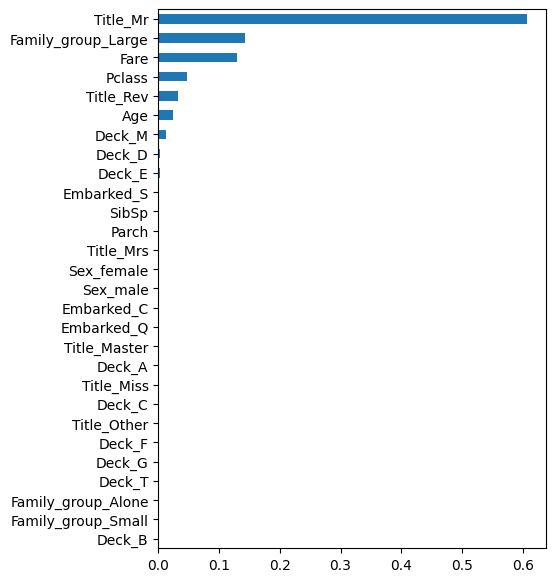

In [334]:
# 특성 중요도
fi = tree_model2.feature_importances_
importance_df = pd.Series(fi, index=X_train.columns) 
plt.figure(figsize=(5,7))
importance_df.sort_values(ascending=True).plot.barh()
plt.show()